# 2장. 지도 학습

In [5]:
class CFG:
    SEED = 42

In [6]:
import random
import os
import numpy as np
#seed 고정
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [7]:
# # 노트북이 코랩에서 실행 중인지 체크합니다.
# import os
# import sys
# if 'google.colab' in sys.modules and not os.path.isdir('mglearn'):
#     # 사이킷런 최신 버전을 설치합니다.
#     !pip install -q --upgrade scikit-learn
#     # mglearn을 다운받고 압축을 풉니다.
#     !wget -q -O mglearn.tar.gz https://bit.ly/mglearn-tar-gz
#     !tar -xzf mglearn.tar.gz
#     !wget -q -O data.tar.gz https://bit.ly/data-tar-gz
#     !tar -xzf data.tar.gz
#     # 나눔 폰트를 설치합니다.
#     !sudo apt-get -qq -y install fonts-nanum
#     import matplotlib.font_manager as fm
#     fm._rebuild()

In [8]:

# 나눔 폰트를 사용합니다.
# from preamble import *
import matplotlib
# from preamble import *
import matplotlib
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
font_name = matplotlib.font_manager.FontProperties(fname=path).get_name()
# 나눔 폰트를 사용합니다.
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False
# # 코랩에서 넘파이 경고를 나타내지 않기 위해
# import sys
# if 'google.colab' in sys.modules:
#     import warnings
#     warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## 2.1 분류와 회귀
## 2.2 일반화, 과대적합, 과소적합
### 2.2.1 모델 복잡도와 데이터셋 사이즈의 관계

## 2.3 지도 학습 알고리즘

In [9]:
X= pd.read_csv('./train.csv')
y = pd.read_csv('./test.csv')

In [10]:
y

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


In [25]:
compare = pd.read_csv('./answer/submit.csv')
logis_compare = pd.read_csv('./answer/LogisticReg_submit.csv')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score
import seaborn as sns

In [12]:
# 재활용1
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
X_train, y_train = get_x_y(X)
X_test = get_x_y(y)

In [13]:
X_train.replace("A A", 1, inplace=True)
X_train.replace("A G", 2, inplace= True)
X_train.replace("G A", 3, inplace= True)
X_train.replace("G G", 4, inplace= True)
X_train.replace("A C", 5, inplace= True)
X_train.replace("C A", 6, inplace= True)
X_train.replace("C C", 7, inplace= True)
X_test.replace("A A", 1, inplace=True)
X_test.replace("A G", 2, inplace= True)
X_test.replace("G A", 3, inplace= True)
X_test.replace("G G", 4, inplace= True)
X_test.replace("A C", 5, inplace= True)
X_test.replace("C A", 6, inplace= True)
X_test.replace("C C", 7, inplace= True)

### 2.3.2 k-최근접 이웃
#### k-최근접 이웃 분류

In [14]:
from sklearn.model_selection import train_test_split
# X_train, y = mglearn.datasets.make_forge()

# X_train, X_test, y_train, y_test = train_test_split(X_train, y, random_state=0)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
print("테스트 세트 예측:", clf.predict(X_test))


테스트 세트 예측: ['A' 'B' 'C' 'B' 'A' 'B' 'C' 'B' 'A' 'A' 'C' 'B' 'B' 'A' 'B' 'B' 'A' 'B'
 'B' 'C' 'B' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'A' 'B' 'A' 'A' 'B' 'C' 'A' 'B'
 'C' 'B' 'B' 'C' 'A' 'B' 'C' 'B' 'B' 'B' 'B' 'C' 'B' 'C' 'A' 'B' 'A' 'B'
 'B' 'B' 'C' 'A' 'B' 'C' 'A' 'B' 'C' 'C' 'C' 'A' 'B' 'A' 'A' 'B' 'B' 'B'
 'A' 'A' 'C' 'B' 'C' 'B' 'B' 'B' 'C' 'B' 'A' 'B' 'B' 'B' 'B' 'B' 'C' 'A'
 'B' 'B' 'B' 'B' 'B' 'C' 'A' 'B' 'A' 'C' 'A' 'B' 'B' 'C' 'A' 'A' 'C' 'B'
 'A' 'B' 'C' 'B' 'B' 'B' 'B' 'A' 'A' 'C' 'B' 'C' 'A' 'B' 'B' 'C' 'C' 'B'
 'B' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'B' 'C' 'A' 'A' 'B' 'A' 'A' 'A' 'C' 'B'
 'B' 'B' 'A' 'B' 'C' 'A' 'A' 'B' 'A' 'B' 'B' 'A' 'A' 'B' 'C' 'A' 'B' 'C'
 'C' 'B' 'A' 'A' 'C' 'B' 'B' 'A' 'B' 'C' 'C' 'B' 'B']


C:\Users\ppjjh\anaconda3\envs\language\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [18]:

submit = pd.read_csv('./sample_submission.csv')

In [19]:
# 재활용2
submit['class'] = clf.predict(X_test)
cm2 = confusion_matrix(compare['class'],submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)','실제값(C)']
                     , columns=['예측값(A)', '예측값(B)','예측값(C)']
                     )

submit.to_csv('./answer/knn_submit.csv', index=False)
cmdf2

C:\Users\ppjjh\anaconda3\envs\language\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,85,1
실제값(C),0,2,36


In [20]:
y_test = compare['class']

In [21]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.98


C:\Users\ppjjh\anaconda3\envs\language\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2.3.3. 선형 모델
#### 회귀의 선형 모델

#### 선형 회귀(최소제곱법)

#### 분류용 선형 모델

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [23]:
y_pred = LogisticRegression(max_iter=5000).fit(X_train, y_train).predict(X_test)


In [26]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(logis_compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/LogisticReg_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,85,0
실제값(C),0,0,39


In [28]:
idx_num = []

In [32]:
y_pred = LogisticRegression(
             penalty = "l2",
             # *,
             dual = False,
             tol = 1e-4,
             C = 3,
             fit_intercept = True,
             intercept_scaling = 1,
             class_weight = None,
             random_state = CFG.SEED,
             solver = "lbfgs",
             # max_iter: Any = 100,
             multi_class = "auto",
             verbose = 0,
             warm_start = False,
             n_jobs = None,
             l1_ratio = None,
            max_iter=5000
                             ).fit(X_train, y_train).predict(X_test)

# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(logis_compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/LogisticReg_again_submit.csv', index=False)
# cmdf2

is_same = logis_compare["class"] != y_pred
for idx, value in enumerate(is_same) :
    if value :
        idx_num.append(idx)
        print(idx)
# y_pred

126


In [33]:
pd.concat([logis_compare['class'], submit['class']], axis=1)

,class,class
0,A,A
1,B,B
2,C,C
3,C,C
4,A,A
...,...,...
170,B,B
171,C,C
172,C,C
173,B,B


In [153]:
# y_pred[3] = 'B'
# y_pred[119] = 'B'

In [154]:
# 3,119는 항상 C로 판단되는데 이걸 B로 바꾸면 어떨까 궁금해짐
# submit['class'] = y_pred
# submit.to_csv('./answer/test_manually_mod_submit.csv', index=False)


In [142]:
# set(idx_num)

{3, 14, 60, 103, 119, 126, 162}

### 2.3.4 나이브 베이즈 분류기

In [20]:
from sklearn.naive_bayes import CategoricalNB

# 나이브 베이즈 모델 선언 및 학습
model = CategoricalNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/CategoricalNB_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,85,1
실제값(C),0,0,38


In [22]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [23]:
counts = {}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1 이 나타난 횟수를 센다.
    counts[label] = X[y == label].sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### 장단점과 매개변수

### 2.3.5 결정 트리

#### 결정 트리 만들기

In [24]:
from sklearn.tree import DecisionTreeClassifier

# cancer = load_breast_cancer()
# X_train, X_test, y_train, y_test = train_test_split(
#     cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.949


In [25]:
y_pred = tree.predict(X_test)

In [26]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Decision_again_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,78,8
실제값(C),0,1,37


In [27]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.920
테스트 세트 정확도: 0.966


In [28]:
y_pred = tree.predict(X_test)

In [29]:
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Decision_again_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,6,32


#### 결정 트리 분석

In [30]:
print("특성 중요도:\n", tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.56784953 0.         0.
 0.         0.04694219 0.12406657 0.         0.         0.
 0.         0.21770824 0.         0.         0.         0.04343347
 0.        ]


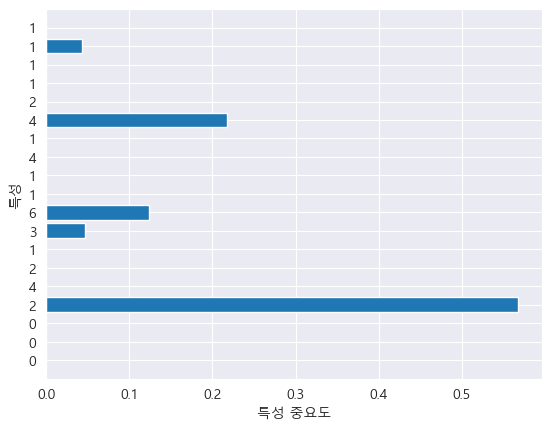

In [31]:
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.iloc[0,:])
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### 2.3.6 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

In [32]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_moons

# X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(
#     cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/RandomForest_again_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


ValueError: The number of FixedLocator locations (19), usually from a call to set_ticks, does not match the number of ticklabels (262).

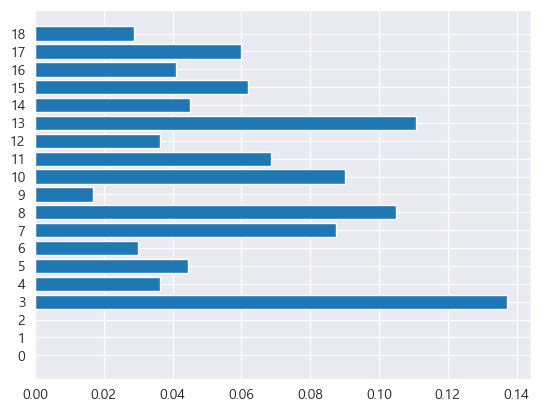

In [95]:
plot_feature_importances_cancer(forest)

##### 장단점과 매개변수

#### 그래디언트 부스팅 회귀 트리

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# X_train, X_test, y_train, y_test = train_test_split(
#     cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

In [35]:
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Gradient_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


In [36]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

# print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

GradientBoostingClassifier(max_depth=1, random_state=0)

In [37]:
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Gradient_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


In [62]:
gbrt = GradientBoostingClassifier(random_state=28, learning_rate=0.2, n_estimators=10, max_depth=1)
gbrt.fit(X_train, y_train)

# print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))
y_pred = forest.predict(X_test)
# print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))
# 재활용2
submit['class'] = y_pred
cm2 = confusion_matrix(compare['class'], submit['class'])
cmdf2 = pd.DataFrame(cm2
                     , index=['실제값(A)', '실제값(B)', '실제값(C)']
                     , columns=['예측값(A)', '예측값(B)', '예측값(C)']
                     )

submit.to_csv('./answer/Gradient_submit.csv', index=False)
cmdf2

,예측값(A),예측값(B),예측값(C)
실제값(A),51,0,0
실제값(B),0,86,0
실제값(C),0,0,38


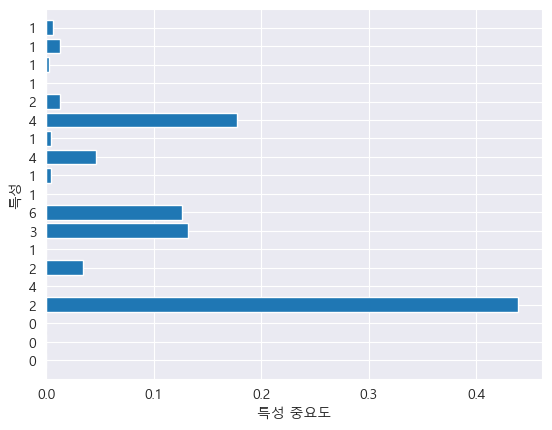

In [40]:
gbrt = GradientBoostingClassifier(random_state=28, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

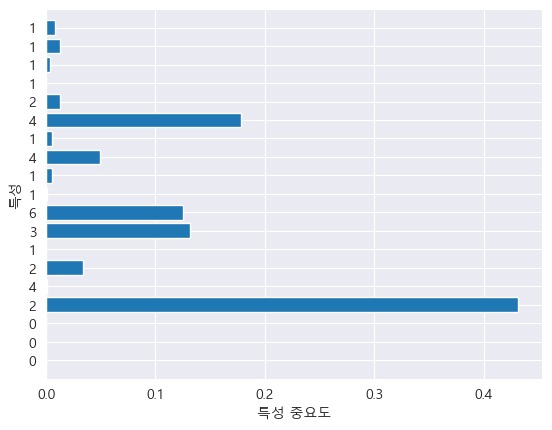

In [61]:
gbrt = GradientBoostingClassifier(random_state=28
                                  , learning_rate=0.2
                                  , n_estimators=100
                                  , max_depth=1
                                  )
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### 장단점과 매개변수

### 2.3.8 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

#### 장단점과 매개변수

### 2.3.9 신경망 (딥러닝)
#### 신경망 모델

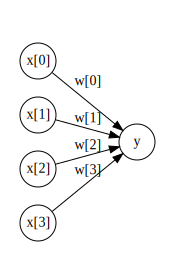

In [95]:
mglearn.plots.plot_logistic_regression_graph()

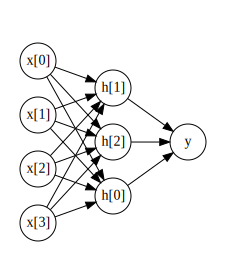

In [96]:
mglearn.plots.plot_single_hidden_layer_graph()

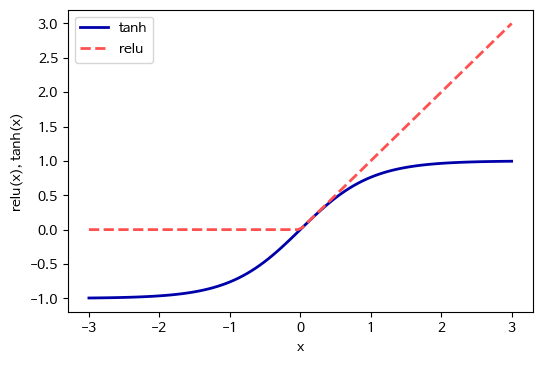

In [97]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")
plt.show() # 책에는 없음

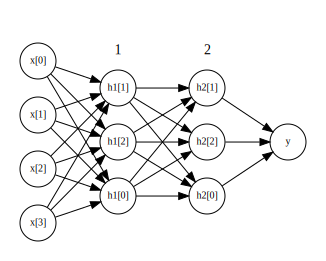

In [98]:
mglearn.plots.plot_two_hidden_layer_graph()

#### 신경망 튜닝

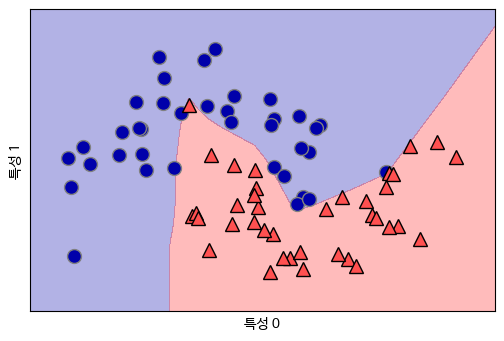

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

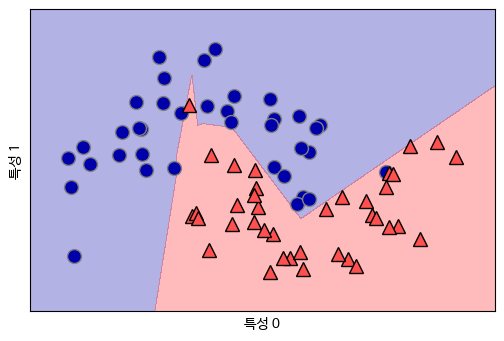

In [100]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], 
                    max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show() # 책에는 없음

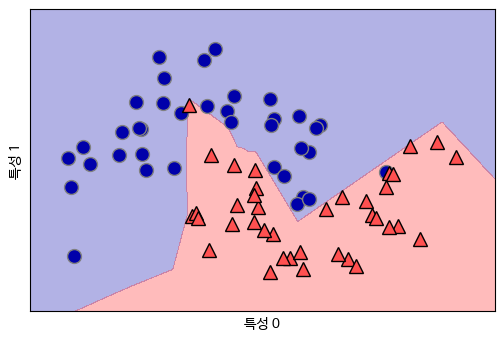

In [101]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

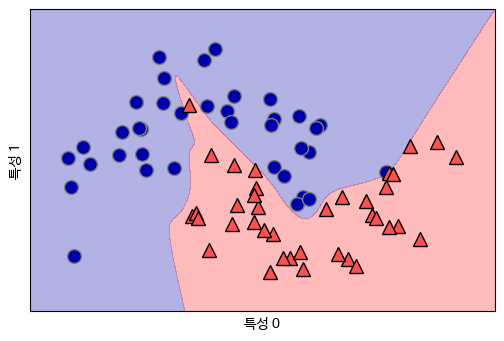

In [102]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()

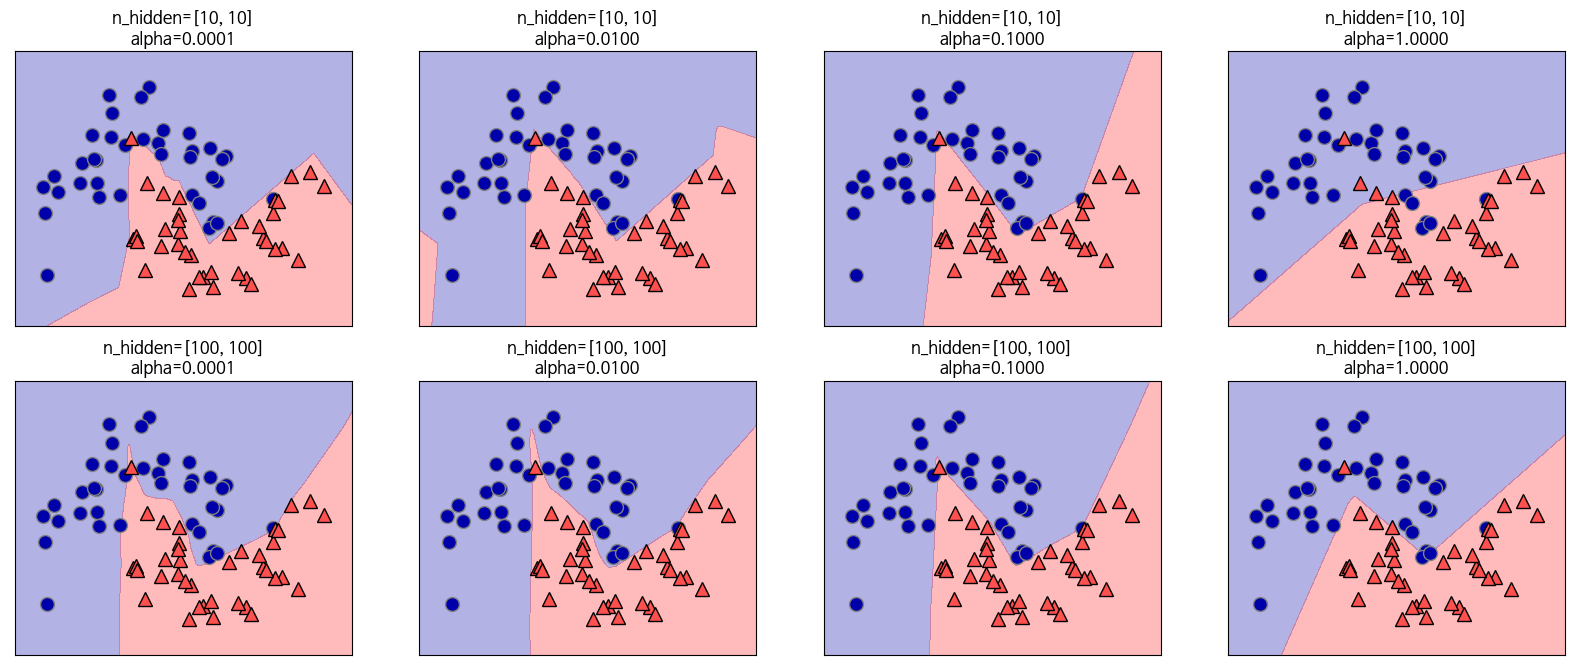

In [103]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

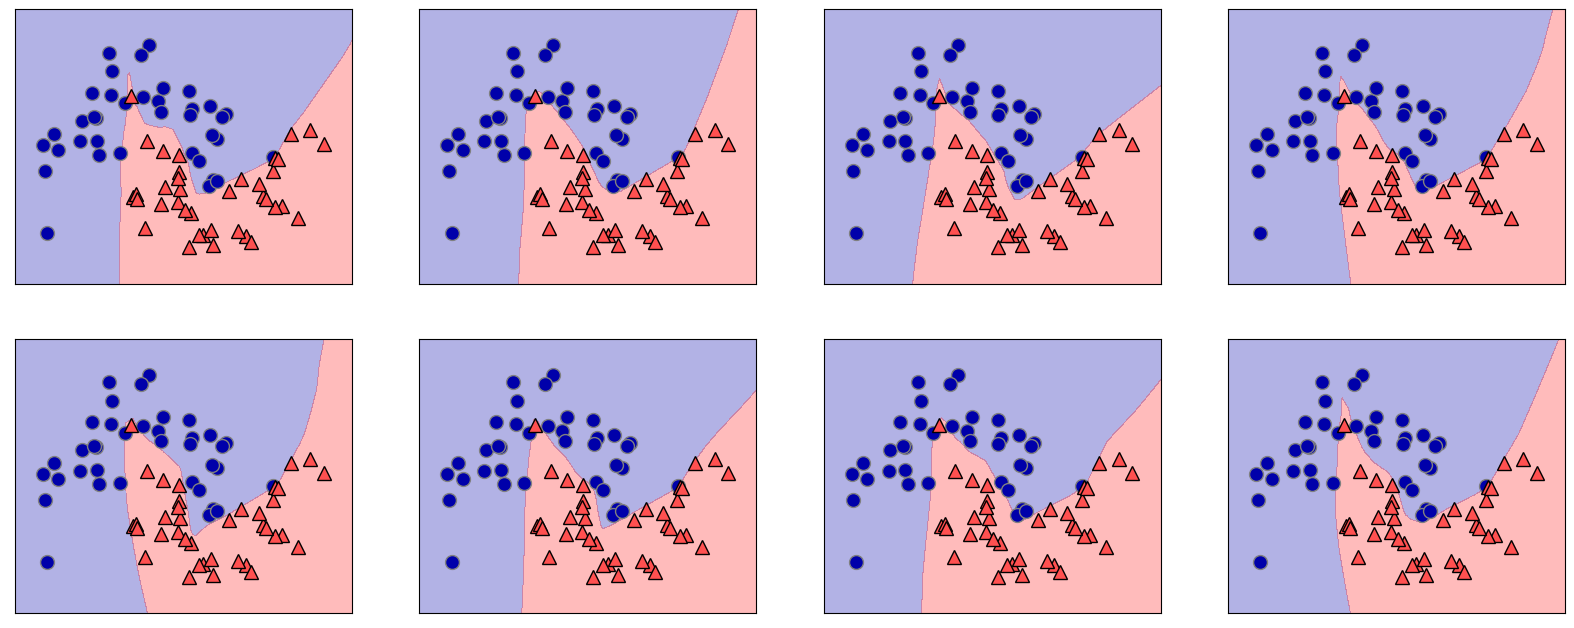

In [104]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [105]:
print("유방암 데이터의 특성별 최대값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최대값:
 [  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [107]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train
 
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


/Users/haesun/github/intro_ml_with_python_2nd_revised/.env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [108]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [109]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


In [110]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

(array([0.026, 0.041, 0.033, 0.031, 0.017, 0.018, 0.036, 0.041, 0.024,
        0.017, 0.055, 0.017, 0.04 , 0.037, 0.013, 0.034, 0.012, 0.016,
        0.014, 0.03 , 0.049, 0.052, 0.042, 0.043, 0.032, 0.015, 0.041,
        0.049, 0.038, 0.026]),
 array([0.001, 0.002, 0.001, 0.001, 0.   , 0.   , 0.001, 0.002, 0.001,
        0.   , 0.003, 0.   , 0.002, 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   , 0.001, 0.002, 0.003, 0.002, 0.002, 0.001, 0.   , 0.002,
        0.002, 0.001, 0.001]))

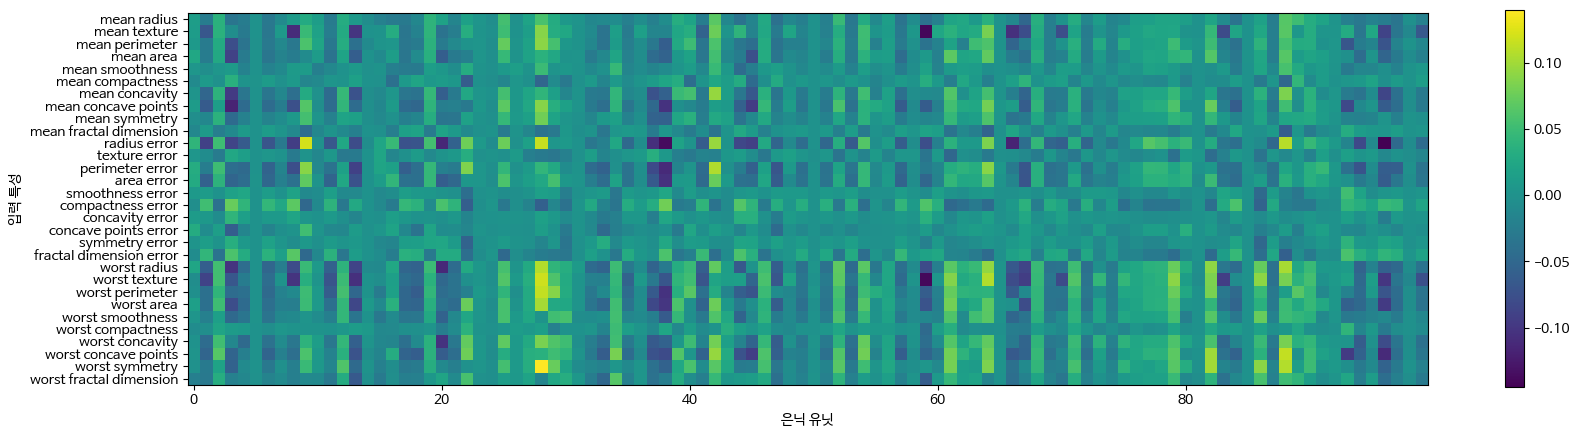

In [111]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()
plt.show() # 책에는 없음

#### 장단점과 매개변수
#### 신경망의 복잡도 추정

## 2.4 분류 예측의 불확실성 추정

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

### 2.4.1 결정 함수

In [113]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태:", gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [114]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n", gbrt.decision_function(X_test)[:6])

결정 함수:
 [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [115]:
print("임계치와 결정 함수 결과 비교:\n",
      gbrt.decision_function(X_test) > 0)
print("예측:\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [116]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다:",
      np.all(pred == gbrt.predict(X_test)))

pred 는 예측 결과와 같다: True


In [117]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


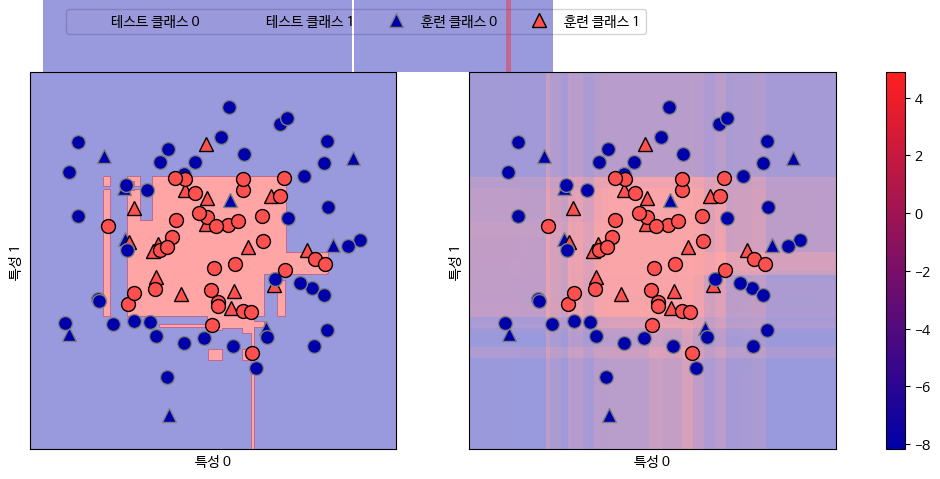

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

### 2.4.2 예측 확률

In [119]:
print("확률 값의 형태:", gbrt.predict_proba(X_test).shape)

확률 값의 형태: (25, 2)


In [120]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n",
      gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
 [[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


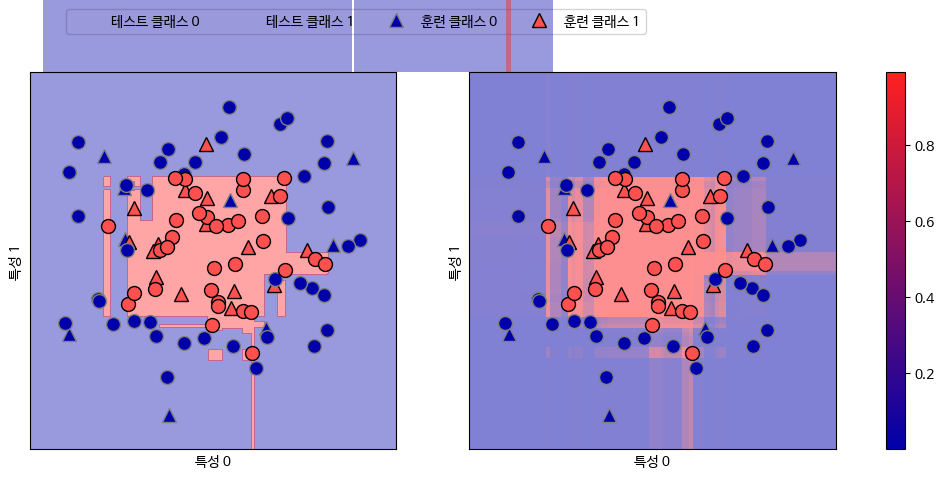

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))
plt.show() # 책에는 없음

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

### 2.4.3 다중 분류에서의 불확실성

In [122]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [123]:
print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
# decision function 결과 중 앞부분 일부를 확인합니다.
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In [124]:
print("가장 큰 결정 함수의 인덱스:\n",
      np.argmax(gbrt.decision_function(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [125]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
합: [1. 1. 1. 1. 1. 1.]


In [126]:
print("가장 큰 예측 확률의 인덱스:\n",
      np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))

가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


사이킷런 0.20 버전에서 `LogisticRegression`의 `multi_class` 매개변수 옵션에 `auto`가 추가되었습니다. `auto`로 설정하면 이진 분류이거나 `solver`가 `liblinear`일 경우에는 `ovr`을 선택하고 그 외에는 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 변경됩니다.

In [127]:
logreg = LogisticRegression(max_iter=1000)

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", logreg.classes_)
print("예측:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classses_에 연결:",
      logreg.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classses_에 연결: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## 2.5 요약 및 정리